### refer content based and hybrid based recommendation

# CLUSTERING OF  DATATYPES

### k mean - numerical
### k modes - categorical
### k prototype - mixed datatypes

### DBSCAN - mixed datatypes

In [56]:
import pandas as pd
import numpy as np

In [57]:
df = pd.read_csv('SalariesCat.csv')
df

,rank,discipline,phd,service,sex,salary
0,Prof,B,56,49,Male,186960
1,Prof,A,12,6,Male,93000
2,Prof,A,23,20,Male,110515
3,Prof,A,40,31,Male,131205
4,Prof,B,20,18,Male,104800
...,...,...,...,...,...,...
73,Prof,B,18,10,Female,105450
74,AssocProf,B,19,6,Female,104542
75,Prof,B,17,17,Female,124312
76,Prof,A,28,14,Female,109954


In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78 entries, 0 to 77
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   rank        78 non-null     object
 1   discipline  78 non-null     object
 2   phd         78 non-null     int64 
 3   service     78 non-null     int64 
 4   sex         78 non-null     object
 5   salary      78 non-null     int64 
dtypes: int64(3), object(3)
memory usage: 3.8+ KB


In [59]:
df.describe()

,phd,service,salary
count,78.000000,78.000000,78.000000
mean,19.705128,15.051282,108023.782051
std,12.498425,12.139768,28293.661022
min,1.000000,0.000000,57800.000000
25%,10.250000,5.250000,88612.500000
50%,18.500000,14.500000,104671.000000
75%,27.750000,20.750000,126774.750000
max,56.000000,51.000000,186960.000000


In [60]:
df.isnull().sum()

rank          0
discipline    0
phd           0
service       0
sex           0
salary        0
dtype: int64

In [61]:
for col in df:
    print(col,df[col].unique(),df[col].nunique())

rank ['Prof' 'AssocProf' 'AsstProf'] 3
discipline ['B' 'A'] 2
phd [56 12 23 40 20 18 29 51 39  1 35 25 17  8  4 19 33  2 30 38 45  7 21  9
 22 27 28 13  5 11 10  3 36 14 26 24] 36
service [49  6 20 31 18 17 19 51 33 23  0  3  7 27  4 30  2 43 21  8 45 36 25 11
  5 14 22  1 26 10 24  9 15] 33
sex ['Male' 'Female'] 2
salary [186960  93000 110515 131205 104800 122400  81285 126300  94350  57800
 128250 134778  88000 162200 153750 150480  75044  92000 107300 150500
 103106  73000  85000  91100  99418 148750 155865  91300 123683 107008
 155750 103275 120000 119800 126933 146856 102000  91000 129000 137000
  74830  80225  77000 151768 140096  74692 103613 111512 122960  97032
 127512 105000  73500  62884  72500  77500 144651 103994 103750 109650
  73300 117555  63100  90450 116450  78500  71065 161101 105450 104542
 124312 109954 109646] 73


<Axes: >

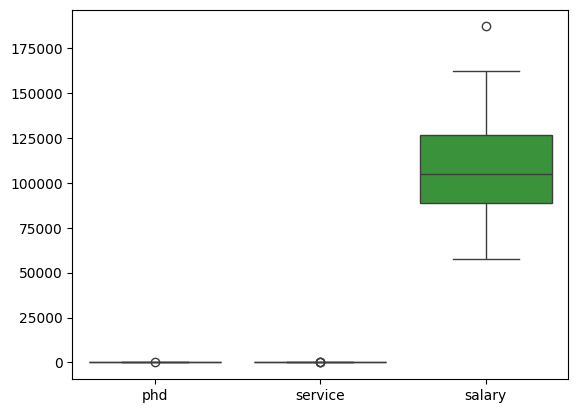

In [62]:
import seaborn as sns
sns.boxplot(df)

# DBSCAN CLUSTERING

In [63]:
import gower
from sklearn.cluster import DBSCAN

gower_dist = gower.gower_matrix(df)
gower_dist

array([[0.        , 0.5617678 , 0.4600817 , ..., 0.47026396, 0.6319286 ,
        0.6442096 ],
       [0.5617678 , 0.        , 0.10168613, ..., 0.42483723, 0.26317257,
        0.2508916 ],
       [0.4600817 , 0.10168613, 0.        , ..., 0.37912259, 0.20214993,
        0.18412788],
       ...,
       [0.47026396, 0.42483723, 0.37912259, ..., 0.        , 0.22833133,
        0.21030928],
       [0.6319286 , 0.26317257, 0.20214993, ..., 0.22833133, 0.        ,
        0.01881693],
       [0.6442096 , 0.2508916 , 0.18412788, ..., 0.21030928, 0.01881693,
        0.        ]], dtype=float32)

In [64]:
gower_dist.shape

(78, 78)

In [65]:
db = DBSCAN(eps = 0.19,min_samples = 3,metric = 'precomputed')
clusters = db.fit_predict(gower_dist)

df['clusterDB'] = clusters
df

,rank,discipline,phd,service,sex,salary,clusterDB
0,Prof,B,56,49,Male,186960,0
1,Prof,A,12,6,Male,93000,0
2,Prof,A,23,20,Male,110515,0
3,Prof,A,40,31,Male,131205,0
4,Prof,B,20,18,Male,104800,0
...,...,...,...,...,...,...,...
73,Prof,B,18,10,Female,105450,0
74,AssocProf,B,19,6,Female,104542,0
75,Prof,B,17,17,Female,124312,0
76,Prof,A,28,14,Female,109954,0


In [66]:
set(clusters)

{-1, 0, 1}

## K- PROTOTYPES

In [67]:
from kmodes.kprototypes import KPrototypes

#separate num,categorical cols
categorical_cols = ['rank','discipline','sex']
categorical_idx = [df.columns.get_loc(col) for col in categorical_cols]
print(categorical_idx)

#convert dataframe to numpy
data_matrix = df.to_numpy()
data_matrix

[0, 1, 4]


array([['Prof', 'B', 56, 49, 'Male', 186960, 0],
       ['Prof', 'A', 12, 6, 'Male', 93000, 0],
       ['Prof', 'A', 23, 20, 'Male', 110515, 0],
       ['Prof', 'A', 40, 31, 'Male', 131205, 0],
       ['Prof', 'B', 20, 18, 'Male', 104800, 0],
       ['Prof', 'A', 20, 20, 'Male', 122400, 0],
       ['AssocProf', 'A', 20, 17, 'Male', 81285, -1],
       ['Prof', 'A', 18, 18, 'Male', 126300, 0],
       ['Prof', 'A', 29, 19, 'Male', 94350, 0],
       ['Prof', 'A', 51, 51, 'Male', 57800, 0],
       ['Prof', 'B', 39, 33, 'Male', 128250, 0],
       ['Prof', 'B', 23, 23, 'Male', 134778, 0],
       ['AsstProf', 'B', 1, 0, 'Male', 88000, 1],
       ['Prof', 'B', 35, 33, 'Male', 162200, 0],
       ['Prof', 'B', 25, 19, 'Male', 153750, 0],
       ['Prof', 'B', 17, 3, 'Male', 150480, 0],
       ['AsstProf', 'B', 8, 3, 'Male', 75044, 1],
       ['AsstProf', 'B', 4, 0, 'Male', 92000, 1],
       ['Prof', 'A', 19, 7, 'Male', 107300, 0],
       ['Prof', 'A', 29, 27, 'Male', 150500, 0],
       ['AsstProf'

In [68]:
kproto = KPrototypes(n_clusters = 3,random_state =42,init = 'Huang')
clusters = kproto.fit_predict(data_matrix,categorical=categorical_idx)
df['clusterKProto'] = clusters
df

,rank,discipline,phd,service,sex,salary,clusterDB,clusterKProto
0,Prof,B,56,49,Male,186960,0,2
1,Prof,A,12,6,Male,93000,0,0
2,Prof,A,23,20,Male,110515,0,1
3,Prof,A,40,31,Male,131205,0,1
4,Prof,B,20,18,Male,104800,0,1
...,...,...,...,...,...,...,...,...
73,Prof,B,18,10,Female,105450,0,1
74,AssocProf,B,19,6,Female,104542,0,1
75,Prof,B,17,17,Female,124312,0,1
76,Prof,A,28,14,Female,109954,0,1


In [69]:
set(clusters)

{0, 1, 2}